# Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_excel('cleaned_data.xlsx')

In [3]:
df.head()

,Sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0


In [4]:
X=df[['total_spend']]
y=df['Sales']

In [5]:
# train test split

from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

# Step 4 : Modelling

In [7]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)

X_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))
X_test_poly=pd.DataFrame(polynomial_converter.fit_transform(X_test))


In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

print("Coeffiecient : ",model.coef_)
print("Intercept : ",model.intercept_ )

Coeffiecient :  [ 6.62854182e-02 -9.61804834e-05  1.66520026e-07]
Intercept :  3.4305141526802725


# Step 5 : Evaluation

In [9]:
#Prediction on train data
ypred_train=model.predict(X_train_poly)

#Evaluation on train data
from sklearn.metrics import r2_score, mean_squared_error
print('Train r2 :', r2_score(y_train,ypred_train))

print("Train RMSE :", np.sqrt(mean_squared_error(y_train,ypred_train)))

Train r2 : 0.8162547370874192
Train RMSE : 2.3126709184811314


**Cross Validation Score**

In [10]:
from sklearn.model_selection import cross_val_score
print("CV Score : ", cross_val_score(model,X_train_poly,y_train, cv=5, scoring='r2').mean())

CV Score :  0.8002243458997128


**Test R2 and RMSE**

In [11]:
#Prediction on test data
ypred_test=model.predict(X_test_poly)

from sklearn.metrics import r2_score
print('Test r2 :', r2_score(y_test,ypred_test))

print("Test RMSE :", np.sqrt(mean_squared_error(y_test,ypred_test)))

Test r2 : 0.3480208378813351
Test RMSE : 3.4801514667136986


## Checking p value 

- must be p<0.05

In [12]:
import statsmodels.formula.api as smf

model1=smf.ols('y~X', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           5.06e-62
Time:                        01:42:53   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2430      0.439      9.676      0.000       3.378       5.108
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

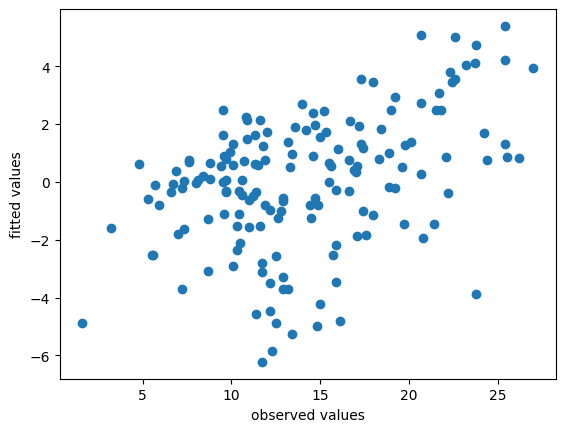

In [13]:
### Checking all assumptions

# Linearity of errors

train_error= y_train - ypred_train

plt.scatter(y_train, train_error)
plt.xlabel("observed values")
plt.ylabel("fitted values")
plt.show()

In [14]:
## Normality of errors

train_error.skew()

np.float64(-0.2954251518188876)

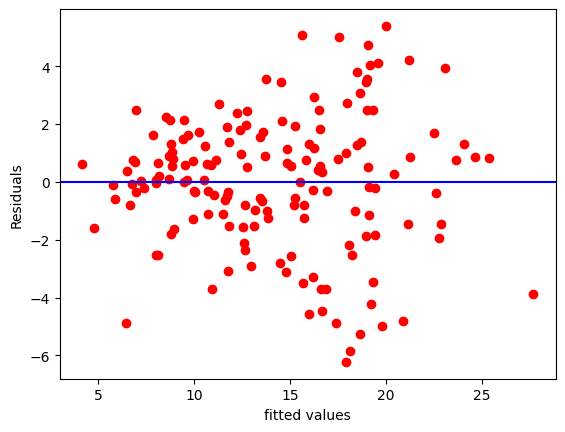

In [15]:
# Equal Variance of error

plt.scatter(ypred_train,train_error,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.show()

- uneqal